In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

22:48:53 - cmdstanpy - INFO - Chain [1] start processing
22:48:53 - cmdstanpy - INFO - Chain [1] done processing
22:48:53 - cmdstanpy - INFO - Chain [1] start processing
22:48:53 - cmdstanpy - INFO - Chain [1] done processing
22:48:53 - cmdstanpy - INFO - Chain [1] start processing
22:48:53 - cmdstanpy - INFO - Chain [1] done processing


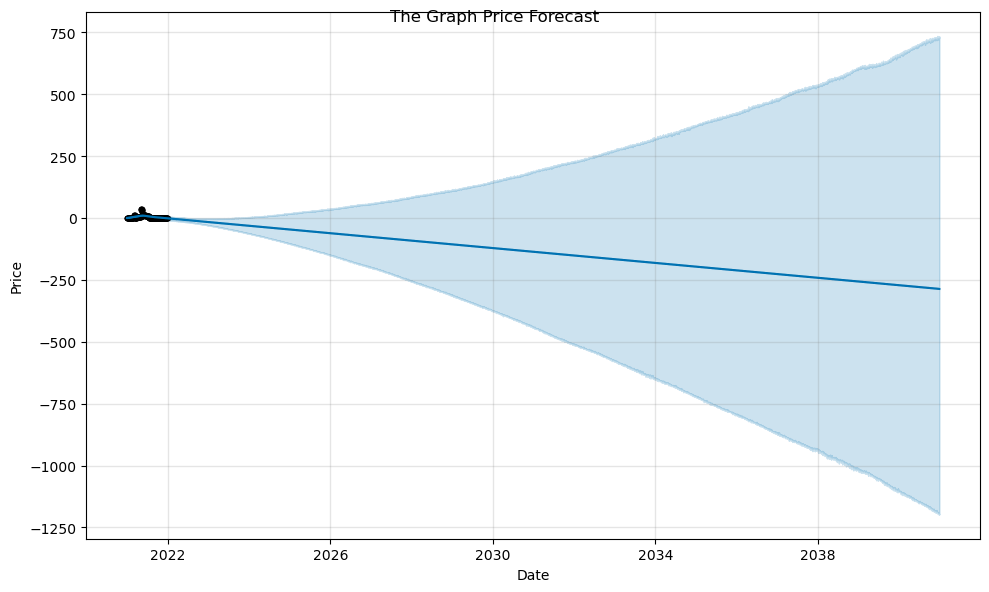

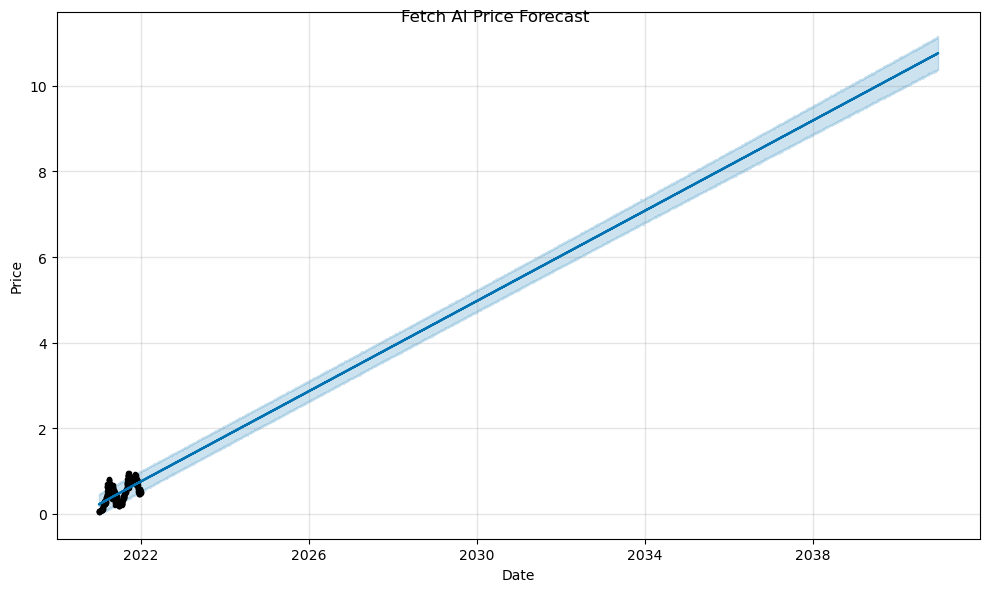

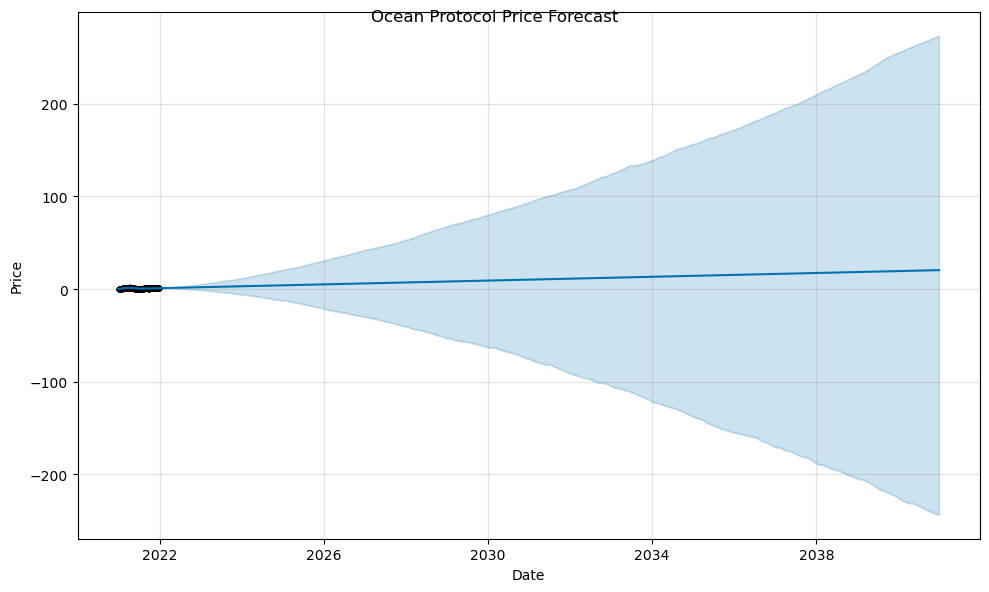

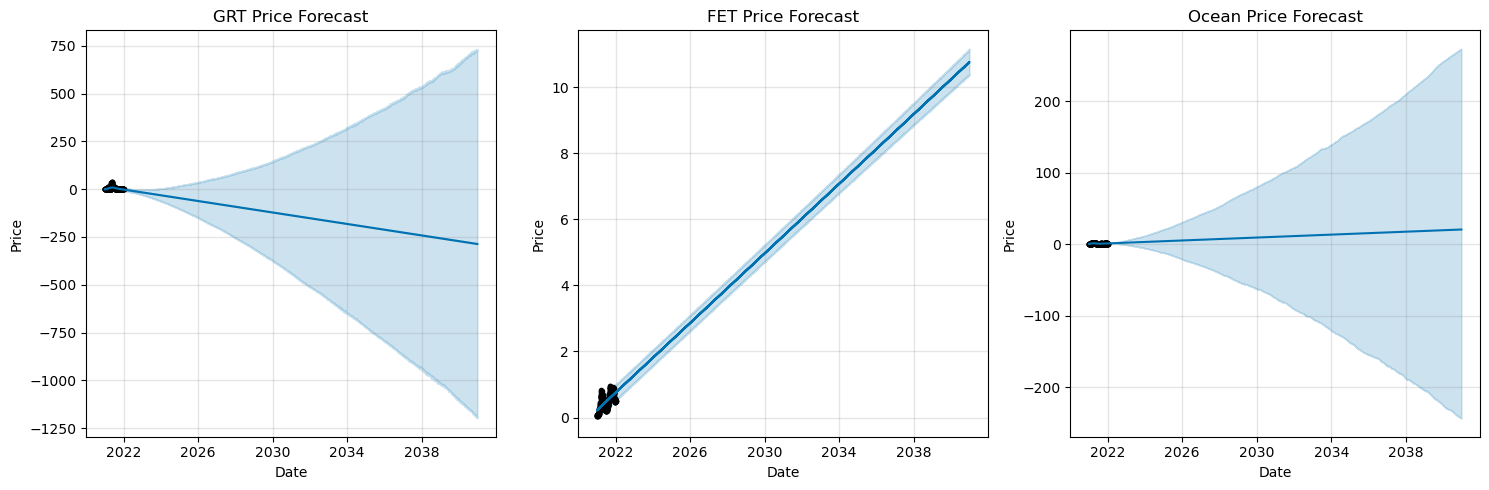

In [26]:
# Load the data into a pandas dataframe
df_grt = pd.read_csv("GRT-USD.csv", usecols=['Date', 'Close']).rename(columns={"Close": "y", "Date": "ds"}).astype({"y": "float"})
df_grt["ds"] = pd.to_datetime(df_grt["ds"])

df_fet = pd.read_csv("FET-USD.csv", usecols=['Date', 'Close']).rename(columns={"Close": "y", "Date": "ds"}).astype({"y": "float"})
df_fet["ds"] = pd.to_datetime(df_fet["ds"])

df_ocean = pd.read_csv("OCEAN-USD.csv", usecols=['Date', 'Close']).rename(columns={"Close": "y", "Date": "ds"}).astype({"y": "float"})
df_ocean["ds"] = pd.to_datetime(df_ocean["ds"])

df = pd.read_csv('GRT-USD.csv')

# Initialize the Prophet model and fit it to the data for each cryptocurrency
model_grt = Prophet()
model_grt.fit(df_grt)

model_fet = Prophet()
model_fet.fit(df_fet)

model_ocean = Prophet()
model_ocean.fit(df_ocean)

# Create a future dataframe to hold the predicted prices for each cryptocurrency
future_grt = model_grt.make_future_dataframe(periods=365 * 19, freq="D")
future_fet = model_fet.make_future_dataframe(periods=365 * 19, freq="D")
future_ocean = model_ocean.make_future_dataframe(periods=365 * 19, freq="D")

# Make predictions for each cryptocurrency using the Prophet model
forecast_grt = model_grt.predict(future_grt)
forecast_fet = model_fet.predict(future_fet)
forecast_ocean = model_ocean.predict(future_ocean)

# Plot the predicted prices for each cryptocurrency
fig_grt = model_grt.plot(forecast_grt, xlabel="Date", ylabel="Price")
fig_grt.suptitle("The Graph Price Forecast")

fig_fet = model_fet.plot(forecast_fet, xlabel="Date", ylabel="Price")
fig_fet.suptitle("Fetch AI Price Forecast")

fig_ocean = model_ocean.plot(forecast_ocean, xlabel="Date", ylabel="Price")
fig_ocean.suptitle("Ocean Protocol Price Forecast")

# Create a new figure with three subplots
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

# Plot the forecast for GRT on the first subplot
model_grt.plot(forecast_grt, ax=ax[0])
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].set_title("GRT Price Forecast")

# Plot the forecast for FET on the second subplot
model_fet.plot(forecast_fet, ax=ax[1])
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Price")
ax[1].set_title("FET Price Forecast")

# Plot the forecast for Ocean on the third subplot
model_ocean.plot(forecast_ocean, ax=ax[2])
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Price")
ax[2].set_title("Ocean Price Forecast")

# Display the figure
plt.show()

